In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm
import time
import skimage.measure
from keras.initializers import RandomNormal
from keras.callbacks import ModelCheckpoint
from keras.models import *
from keras.layers import *
from keras.optimizers import SGD
from keras.models import model_from_json
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Example of Image in the Dataset

Number of people: 168
(768, 1024, 3) (96, 128)


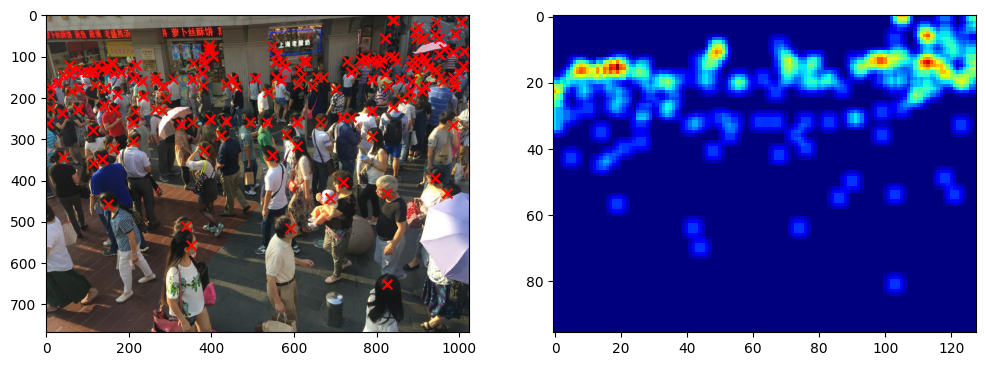

In [ ]:

img = cv2.cvtColor(cv2.imread(".../train_data/images/IMG_116.jpg"), cv2.COLOR_BGR2RGB)

heads = loadmat('.../train_data/ground_truth/GT_IMG_116.mat')
map_red=np.load('.../train_data/maps/IMG_116.npy')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)

for x,y in heads["image_info"][0, 0][0, 0][0]:
    plt.scatter(round(x),round(y), s = 50, marker = "x", color = "r")
plt.subplot(1, 2, 2)

plt.imshow(map_red,cmap = cm.jet)

print(f"Number of people: {len(heads['image_info'][0, 0][0, 0][0])}")
print(img.shape,map_red.shape)

# Save into array Train images, Ground Truth and Labels

In [ ]:
Train_imgs_B = []
Train_density_B = []
Train_labels_B = []

path_images = ".../train_data/images/"
path_heads = ".../train_data/ground_truth/"
path_maps = ".../train_data/maps/"



for img_name, den_name, heads_name in zip(sorted(os.listdir(path = path_images)), sorted(os.listdir(path = path_maps)), sorted(os.listdir(path = path_heads))):

    img = preprocess_input(cv2.cvtColor(cv2.imread(path_images + img_name), cv2.COLOR_BGR2RGB))
    Train_imgs_B.append(img)

    img = np.load(path_maps + den_name)
    Train_density_B.append(img)

    Train_labels_B.append(len(loadmat(path_heads + heads_name)['image_info'][0, 0][0, 0][0]))


Train_imgs_B = np.asarray(Train_imgs_B)
Train_density_B = np.asarray(Train_density_B)
Train_labels_B= np.asarray(Train_labels_B)

## Train distribution


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


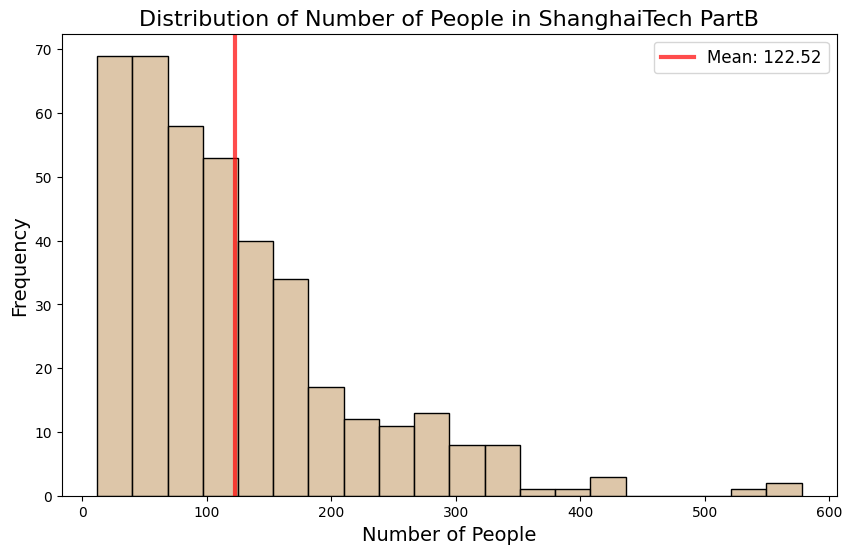

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
sns.histplot(Train_labels_B, bins=20, color='#D2B48C', edgecolor='black')

mean_value = np.mean(Train_labels_B)
median_value = np.median(Train_labels_B)

plt.axvline(mean_value, linewidth=3, color='red', label=f"Mean: {mean_value:.2f}", alpha=0.7)

plt.title('Distribution of Number of People in ShanghaiTech PartB', fontsize=16)
plt.xlabel('Number of People', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)

plt.show()


# Save into array Test images, Ground Truth and Labels

In [ ]:
Test_imgs_B = []
Test_density_B = []
Test_labels_B = []

path_images = ".../test_data/images/"
path_heads = ".../test_data/ground_truth/"
path_maps = ".../test_data/maps/"

for img_name, den_name, heads_name in zip(sorted(os.listdir(path = path_images)), sorted(os.listdir(path = path_maps)), sorted(os.listdir(path = path_heads))):

    Test_imgs_B.append(preprocess_input(cv2.cvtColor(cv2.imread(path_images + img_name), cv2.COLOR_BGR2RGB)))
    Test_density_B.append(np.load(path_maps + den_name))
    Test_labels_B.append(len(loadmat(path_heads + heads_name)['image_info'][0, 0][0, 0][0]))

## Test distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


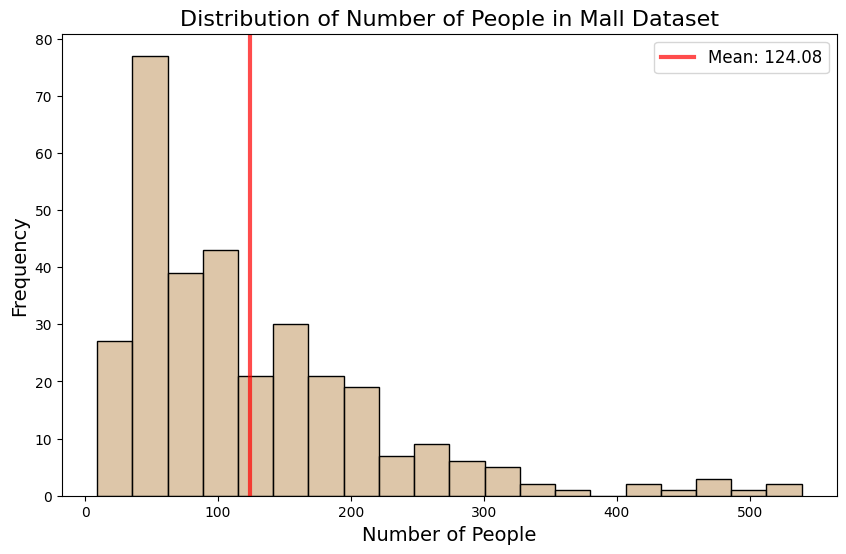

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))
sns.histplot(Test_labels_B, bins=20, color='#D2B48C', edgecolor='black')

mean_value = np.mean(Test_labels_B)
median_value = np.median(Test_labels_B)

plt.axvline(mean_value, linewidth=3, color='red', label=f"Mean: {mean_value:.2f}", alpha=0.7)

plt.title('Distribution of Number of People in Mall Dataset', fontsize=16)
plt.xlabel('Number of People', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)

plt.show()


## Comparison between Train and Test distributions

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


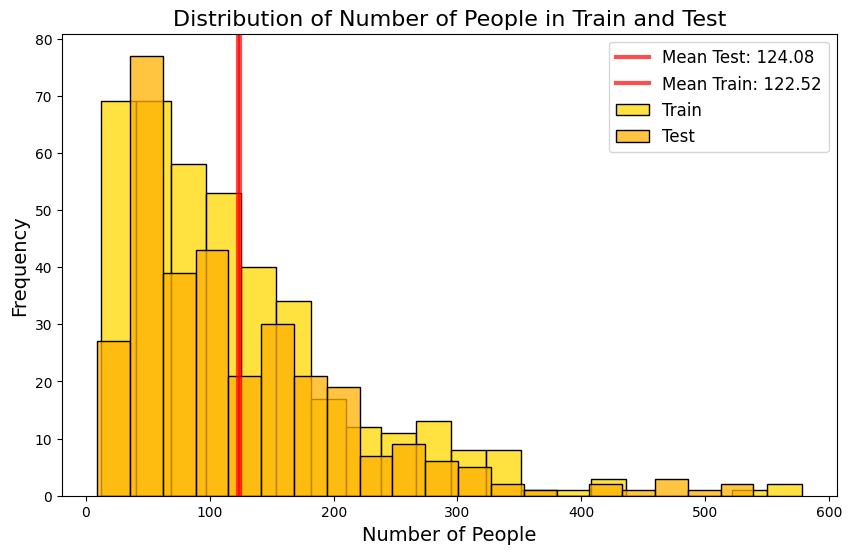

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))
sns.histplot(Train_labels_B, bins=20,color='#FFD700', edgecolor='black',label='Train')
sns.histplot(Test_labels_B,bins=20, color='#FFB000', edgecolor='black',label='Test')


mean_value_test = np.mean(Test_labels_B)
mean_value_train = np.mean(Train_labels_B)

plt.axvline(mean_value_test, linewidth=3, color='red', label=f"Mean Test: {mean_value_test:.2f}", alpha=0.7)
plt.axvline(mean_value_train, linewidth=3, color='red', label=f"Mean Train: {mean_value_train:.2f}", alpha=0.7)

plt.title('Distribution of Number of People in Train and Test', fontsize=16)
plt.xlabel('Number of People', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)

plt.show()


# Model Definition

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, Input
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.applications import VGG16
import numpy as np
import os


weights_path = ".../vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

def build_CSRnet(input_shape):
    VGG_16 = VGG16(weights=weights_path, include_top=False, input_shape=input_shape)


    VGG_16 = Model(VGG_16.input, VGG_16.layers[-6].output)

    Map_estimator_net = Sequential([
        Conv2D(512, (3, 3), dilation_rate=2, padding='same', kernel_initializer=RandomNormal(stddev=0.01)),
        LeakyReLU(alpha=0.01),
        Conv2D(512, (3, 3), dilation_rate=2, padding='same', kernel_initializer=RandomNormal(stddev=0.01)),
        LeakyReLU(alpha=0.01),
        Conv2D(512, (3, 3), dilation_rate=2, padding='same', kernel_initializer=RandomNormal(stddev=0.01)),
        LeakyReLU(alpha=0.01),
        Conv2D(256, (3, 3), dilation_rate=2, padding='same', kernel_initializer=RandomNormal(stddev=0.01)),
        LeakyReLU(alpha=0.01),
        Conv2D(128, (3, 3), dilation_rate=2, padding='same', kernel_initializer=RandomNormal(stddev=0.01)),
        LeakyReLU(alpha=0.01),
        Conv2D(64, (3, 3), dilation_rate=2, padding='same', kernel_initializer=RandomNormal(stddev=0.01)),
        LeakyReLU(alpha=0.01),
        Conv2D(1, (1, 1), dilation_rate=1, padding='same', kernel_initializer=RandomNormal(stddev=0.01)),
        LeakyReLU(alpha=0.01)
    ])(VGG_16.output)

    CSRnet = Model(inputs=VGG_16.input, outputs=Map_estimator_net)
    #CSRnet.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2, decay=5e-4, momentum=0.9), loss="mae", metrics=["mae"])
    CSRnet.compile(optimizer=Adam(learning_rate=1e-5), loss="mae", metrics=["mae"])


    return CSRnet


# Train and Test functions definition

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam


def train_CSRnet(CSRnet, Train_imgs_B, Train_density_B, checkpoint_filepath):
    if not os.path.exists('./checkpoints'):
        os.makedirs('./checkpoints')

    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_mae',
        mode='min',
        save_best_only=True,
        verbose=1)

    early_stopping_callback = EarlyStopping(
        monitor='val_mae',
        patience=15,
        mode='min',
        verbose=1,
        restore_best_weights=True)

    history = CSRnet.fit(Train_imgs_B, Train_density_B,
                         batch_size=1, epochs=100,
                         validation_split=0.1, steps_per_epoch=100,
                         callbacks=[model_checkpoint_callback])

    return history

def test_CSRnet(CSRnet, Test_imgs, Test_labels, file_parameters_path):
    CSRnet.load_weights(file_parameters_path)

    mae_error = 0
    mse_error = 0
    mape_error = 0


    N = len(Test_labels)
    for i, (x, y) in enumerate(zip(Test_imgs, Test_labels)):

        print(i)

        mae_error += np.abs(np.sum(CSRnet.predict(np.reshape(np.asarray(x),(1, x.shape[0], x.shape[1], x.shape[2])))) - y)
        mse_error += np.square(np.sum(CSRnet.predict(np.reshape(np.asarray(x),(1, x.shape[0], x.shape[1], x.shape[2])))) - y)
        mape_error += np.abs((np.sum(CSRnet.predict(np.reshape(np.asarray(x),(1, x.shape[0], x.shape[1], x.shape[2])))) - y) / y)* 100

    return mae_error/N, np.sqrt(mse_error/N), mape_error/N



checkpoint_filepath = './checkpoints/checkpoint.weights.h5'


input_shape = (None, None, 3)
CSRnet = build_CSRnet(input_shape)
CSRnet.summary()


history = train_CSRnet(CSRnet, Train_imgs_B, Train_density_B, checkpoint_filepath)


if os.path.isfile(checkpoint_filepath):
    print(f"The best weights have been saved in: {checkpoint_filepath}")
else:
    print(f"The weights were not saved correctly. Check the path: {checkpoint_filepath}")





/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, None, None, 1)  │     8,628,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,263,489 (62.04 MB)

 Trainable params: 16,263,489 (62.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


2024-07-15 20:10:10.241551: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,64,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,64,768,1024]{3,2,1,0}, f32[1,64,768,1024]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-07-15 20:10:10.495055: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.253594066s
Trying algorithm eng0{} for conv (f32[64,64,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,64,768,1024]{3,2,1,0}, f32[1,64,768,1024]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-07-15 20:10:12.511330: E external/

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - loss: 0.0094 - mae: 0.0094
Epoch 1: val_mae improved from inf to 0.00716, saving model to ./checkpoints/checkpoint.weights.h5
100/100 ━━━━━━━━━━━━━━━━━━━━ 99s 375ms/step - loss: 0.0094 - mae: 0.0094 - val_loss: 0.0072 - val_mae: 0.0072
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - loss: 0.0067 - mae: 0.0067
Epoch 2: val_mae improved from 0.00716 to 0.00637, saving model to ./checkpoints/checkpoint.weights.h5
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 372ms/step - loss: 0.0067 - mae: 0.0067 - val_loss: 0.0064 - val_mae: 0.0064
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - loss: 0.0054 - mae: 0.0054
Epoch 3: val_mae did not improve from 0.00637
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 364ms/step - loss: 0.0054 - mae: 0.0054 - val_loss: 0.0067 - val_mae: 0.0067
Epoch 4/100
 60/100 ━━━━━━━━━━━━━━━━━━━━ 12s 317ms/step - loss: 0.0057 - mae: 0.0057

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 4: val_mae did not improve from 0.00637
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 233ms/step - loss: 0.0058 - mae: 0.0058 - val_loss: 0.0068 - val_mae: 0.0068
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - loss: 0.0047 - mae: 0.0047
Epoch 5: val_mae improved from 0.00637 to 0.00618, saving model to ./checkpoints/checkpoint.weights.h5
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 370ms/step - loss: 0.0047 - mae: 0.0047 - val_loss: 0.0062 - val_mae: 0.0062
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - loss: 0.0048 - mae: 0.0048
Epoch 6: val_mae did not improve from 0.00618
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 364ms/step - loss: 0.0048 - mae: 0.0048 - val_loss: 0.0063 - val_mae: 0.0063
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - loss: 0.0045 - mae: 0.0045
Epoch 7: val_mae improved from 0.00618 to 0.00594, saving model to ./checkpoints/checkpoint.weights.h5
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 368ms/step - loss: 0.0045 - mae: 0.0045 - val_loss: 0.0059 - val_mae: 0.0059
Epoch 8/1

## Test values

In [ ]:
mae, mse, mape  = test_CSRnet(CSRnet, Test_imgs_B, Test_labels_B, checkpoint_filepath)
print(f"Mean Absolute Error: {mae}, Mean Square Error: {mse}, Mean Absolute Percentage Error:{mape}")

0
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 945ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26m

# Print some images and train curve

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


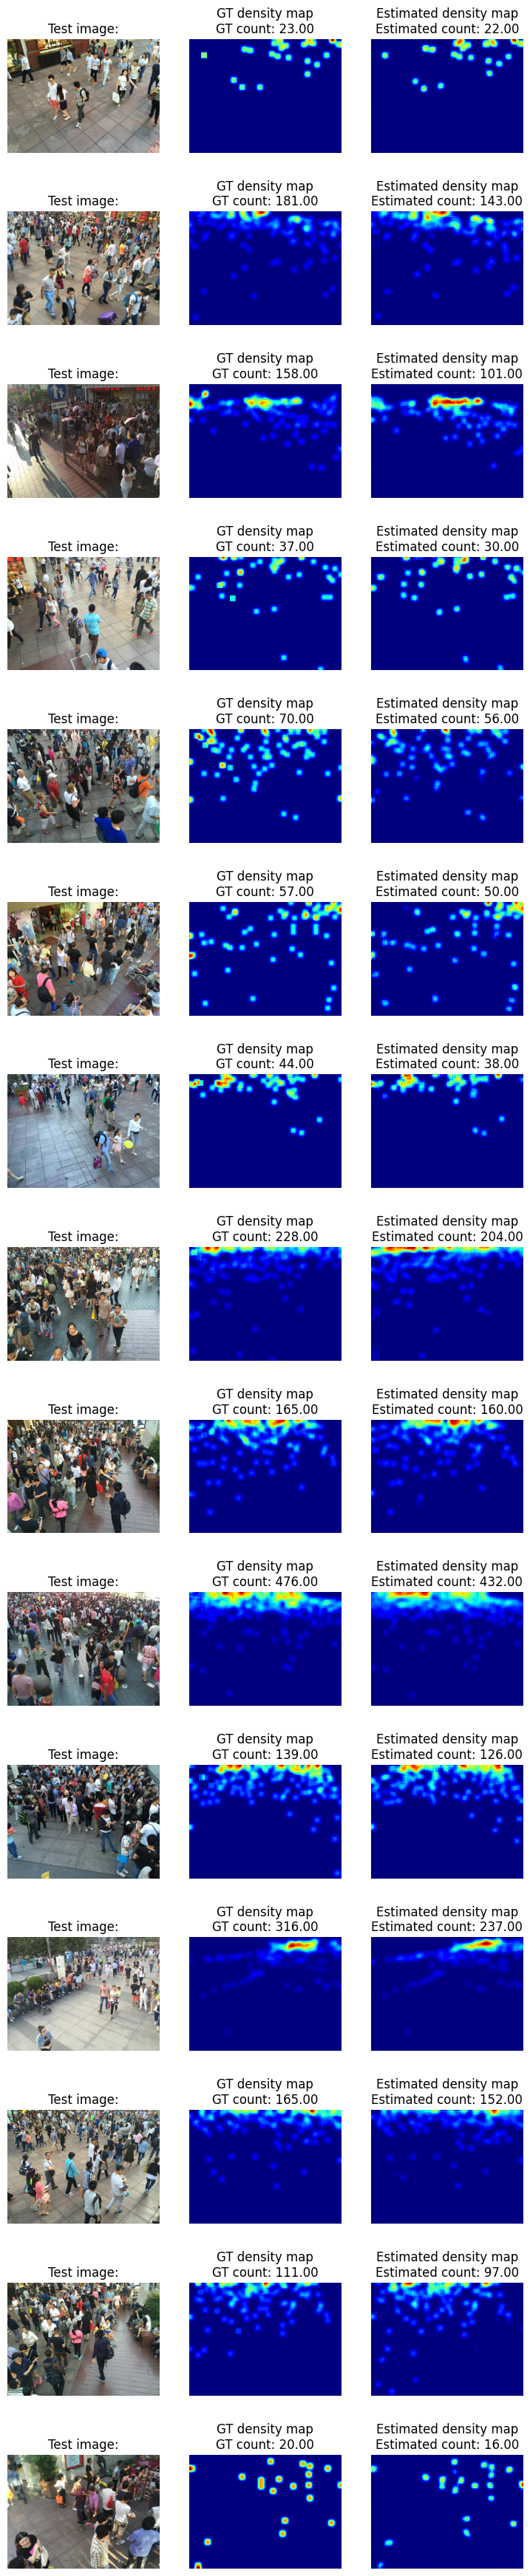

In [ ]:
to_print = 15
plt.figure(figsize=(9, 3 * to_print))
path_images = ".../test_data/images/"
path_heads = ".../test_data/ground_truth/"

for i, (img, dens, raw, head) in enumerate(zip(Test_imgs_B, Test_density_B, sorted(os.listdir(path = path_images)),sorted(os.listdir(path = path_heads)))):

    if i == to_print: break

    estimated_dens = CSRnet.predict(np.reshape(np.asarray(img),(1,img.shape[0],img.shape[1],img.shape[2])))

    heads = loadmat(path_heads + head)
    true_number=len(heads['image_info'][0, 0][0, 0][0])
    predicted_number=int(np.sum(estimated_dens))

    plt.subplot(to_print, 3, i * 3 + 1)
    plt.axis("off")
    plt.title("Test image:")
    plt.imshow(cv2.cvtColor(cv2.imread(path_images + raw), cv2.COLOR_BGR2RGB))

    plt.subplot(to_print, 3, i * 3 + 2)
    plt.axis("off")
    plt.title("GT density map:")
    plt.title(f"GT density map\nGT count: {true_number:.2f}")

    plt.imshow(dens , cmap = cm.jet)


    plt.subplot(to_print, 3, i * 3 + 3)
    plt.axis("off")
    plt.title("Estimated density map:")
    plt.title(f"Estimated density map\nEstimated count: { predicted_number:.2f}")

    plt.imshow(estimated_dens.reshape((estimated_dens.shape[1], estimated_dens.shape[2], 1)) , cmap = cm.jet)

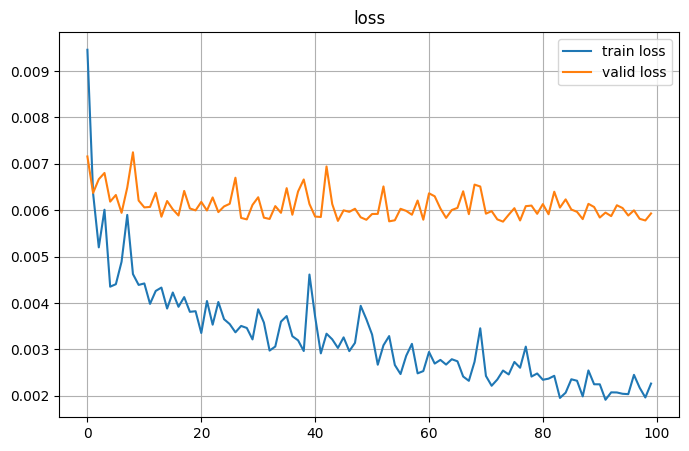

In [ ]:
def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.epoch,history.history['loss'], label='train loss')
    plt.plot(history.epoch,history.history['val_loss'], label='valid loss')
    plt.legend()
    plt.title('loss')
    plt.grid(True)
    plt.show()
plot_learning_curves(history)
